In [274]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline



In [275]:
import warnings

warnings.filterwarnings('ignore')

In [276]:
#Load the dataset
df = pd.read_csv('Metric_test.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Unnamed: 0,Unnamed: 0.1,processed_tweets,Analysis,True Sentiment
0,0,49371,bjp cant manage covid vaccine management prope...,Negative,Negative
1,1,62860,company like pfizer moderna refuse test safety...,Positive,Positive
2,2,898,u vice president wife received shot friday mor...,Positive,Positive
3,3,29632,NaN,Positive,NaN
4,4,56395,thankful blessed part history got 2nd dose sin...,Positive,Positive


In [277]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'processed_tweets'], axis=1, inplace=True)


In [278]:
df.head()

,Analysis,True Sentiment
0,Negative,Negative
1,Positive,Positive
2,Positive,Positive
3,Positive,NaN
4,Positive,Positive


In [279]:
def sentiment_to_polarity(analysis):
  if analysis == "Negative":
    return 0
  else:
    return 1

In [280]:
df['Analysis'] = df['Analysis'].apply(sentiment_to_polarity)
df['True Sentiment'] = df['True Sentiment'].apply(sentiment_to_polarity)

In [281]:
df.head()

,Analysis,True Sentiment
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1


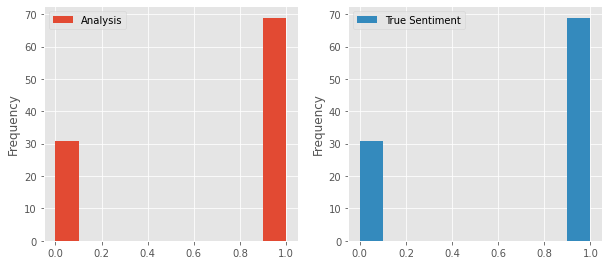

In [282]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(10,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [287]:
# calculate accuracy
from sklearn import metrics

In [291]:

print(metrics.confusion_matrix(df['True Sentiment'], df['Analysis']))
                                  

[[22  9]
 [ 9 60]]


<AxesSubplot:>

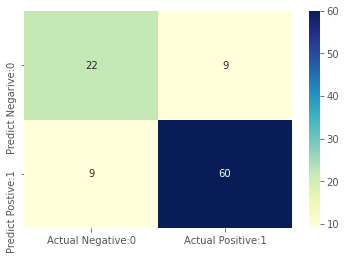

In [292]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=confusion_matrix(df['True Sentiment'], df['Analysis']), columns=['Actual Negative:0', 'Actual Positive:1'], 
                                 index=['Predict Negarive:0', 'Predict Postive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [293]:
from sklearn.metrics import classification_report

print(classification_report(df['True Sentiment'], df['Analysis']))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        31
           1       0.87      0.87      0.87        69

    accuracy                           0.82       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.82      0.82      0.82       100

